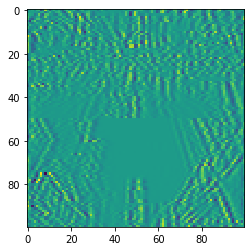

In [9]:
import torch
import pickle
import matplotlib.pyplot as plot

broken_image = torch.FloatTensor( pickle.load(open('./broken_image_t.p', 'rb'), encoding='latin1'))

plot.imshow(broken_image.view(100, 100))

In [10]:
def weird_function(x, n_iter=5):
    h = x
    filt = torch.tensor([-1./3, 1./3, -1./3])
    for i in range(n_iter):
        zero_tensor = torch.tensor([1.0*0])
        #h_l = torch.cat((zero_tensor, h[:, -1]), 0)
        h_l = torch.cat( (zero_tensor, h[:-1]), 0)
        h_r = torch.cat((h[1:], zero_tensor), 0)
        h = filt[0] * h + filt[2] * h_l + filt[1] * h_r
        if i % 2 == 0:
            h = torch.cat((h[h.shape[0]//2:], h[:h.shape[0]//2]), 0)
        return h

In [11]:
def distance_loss(hypothesis, broken_image):
    return torch.dist(hypothesis, broken_image)

Loss at 0 = 57.424495697021484
Loss at 1000 = 0.15762095153331757
Loss at 2000 = 0.1575964242219925
Loss at 3000 = 0.15758588910102844
Loss at 4000 = 0.15759533643722534
Loss at 5000 = 0.15760251879692078
Loss at 6000 = 0.15759754180908203
Loss at 7000 = 0.15755239129066467
Loss at 8000 = 0.15753351151943207
Loss at 9000 = 0.15751594305038452
Loss at 10000 = 0.15751206874847412
Loss at 11000 = 0.15752778947353363
Loss at 12000 = 0.15754006803035736
Loss at 13000 = 0.1575491726398468
Loss at 14000 = 0.15755116939544678
Loss at 15000 = 0.15758776664733887
Loss at 16000 = 0.15755921602249146
Loss at 17000 = 0.1575644612312317
Loss at 18000 = 0.1575593203306198
Loss at 19000 = 0.15760228037834167


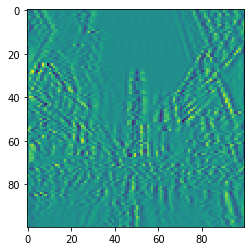

In [12]:
random_tensor = torch.randn(10000, dtype=torch.float)
lr = 0.8

for i in range(0, 20000):
    random_tensor.requires_grad_(True)
    hypothesis = weird_function(random_tensor)
    loss = distance_loss(hypothesis, broken_image)
    loss.backward()

    with torch.no_grad():
        random_tensor = random_tensor - lr * random_tensor.grad
    if i % 1000 == 0:
        print('Loss at {} = {}'.format(i, loss.item()))

plot.imshow(random_tensor.view(100, 100).data)